# Reducción de dimensiones con PCA y Clustering

In [1]:
# Cargar librerias para ciencia de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Preprocesamiento de los datos
from sklearn.preprocessing import StandardScaler # Normalización
from sklearn.preprocessing import LabelEncoder #


# PCA y Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Visualización de componentes principales
from yellowbrick.features import PCA as biplot

# Visualización de clusters
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

pd.set_option('display.max_columns', None)

In [2]:
# Para conectarse con google drive
#from google.colab import drive
#drive.mount('/gdrive')

# Configurar directorio de trabajo
#os.chdir('/gdrive/MyDrive/Colab Notebooks/Analitica de Datos UJaveriana')

# Verificar los archivos de las carpetas
#!ls

# Caso 1. Arrestos en Estados Unidos

Este conjunto de datos contiene estadísticas en arrestos por cada 100.000 residentes por agresión, asesinato y violación en cada uno de los 50 estados de EE. UU. en 1973. También se proporciona el porcentaje de la población que vive en áreas urbanas.

- Asesinato: Arrestos por asesinato (por cada 100.000 habitantes)
- Agresión: Detenciones por agresión (por cada 100.000 habitantes)
- Violación: Detenciones por violación (por cada 100.000 habitantes)
- Población: Porcentaje de población urbana

In [3]:
datos = pd.read_csv("USArrestos.csv")
datos

,Estado,Asesinato,Agresión,Violación,Población
0,Alabama,13.2,236,21.2,58
1,Alaska,10.0,263,44.5,48
2,Arizona,8.1,294,31.0,80
3,Arkansas,8.8,190,19.5,50
4,California,9.0,276,40.6,91
5,Colorado,7.9,204,38.7,78
6,Connecticut,3.3,110,11.1,77
7,Delaware,5.9,238,15.8,72
8,Florida,15.4,335,31.9,80
9,Georgia,17.4,211,25.8,60


## Análisis Exploratorio

In [4]:
# Estadísticas descriptivas
datos.describe().round(2)

,Asesinato,Agresión,Violación,Población
count,50.00,50.00,50.00,50.00
mean,7.79,170.76,21.23,65.54
std,4.36,83.34,9.37,14.47
min,0.80,45.00,7.30,32.00
25%,4.08,109.00,15.08,54.50
50%,7.25,159.00,20.10,66.00
75%,11.25,249.00,26.18,77.75
max,17.40,337.00,46.00,91.00


<Figure size 800x800 with 0 Axes>

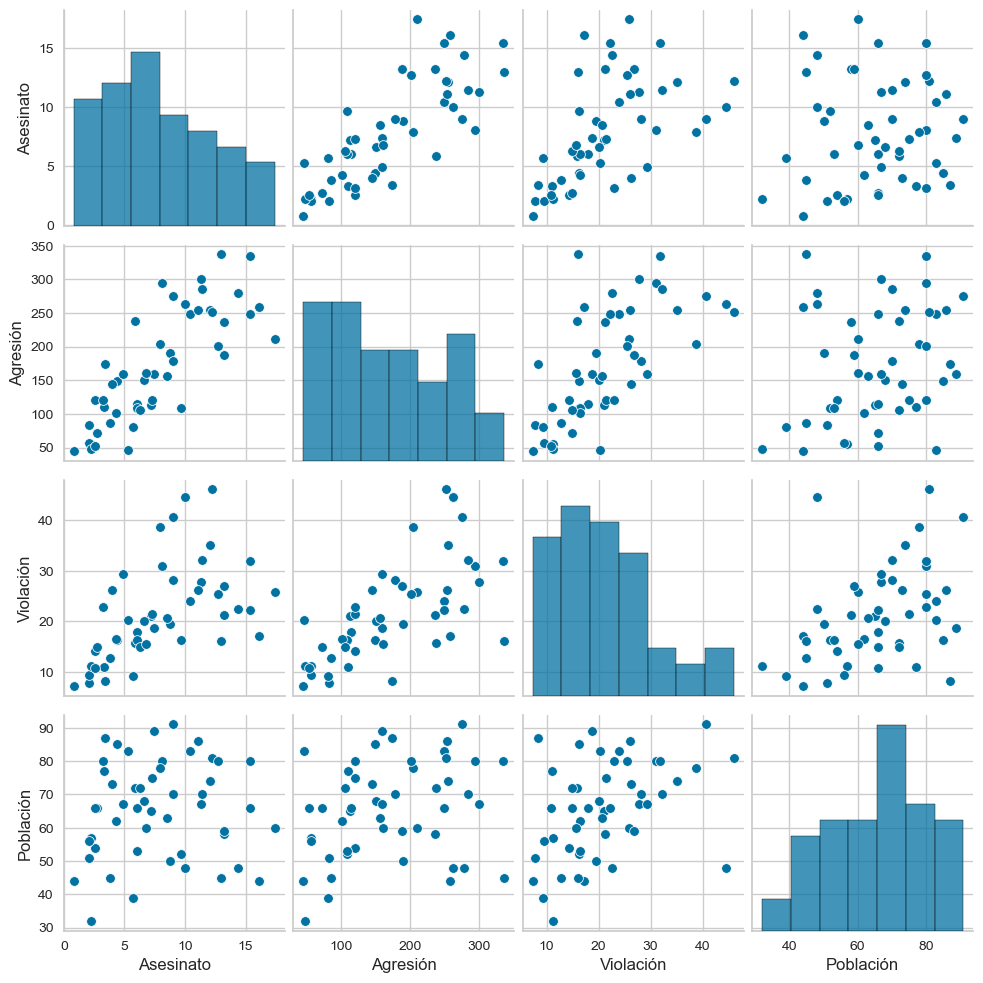

In [5]:
# Relación entre variables
plt.figure(figsize=(8,8))
sns.pairplot(data=datos)

In [6]:
# Correlación
datos.corr(numeric_only=True)

,Asesinato,Agresión,Violación,Población
Asesinato,1.000000,0.801873,0.563579,0.069573
Agresión,0.801873,1.000000,0.665241,0.258872
Violación,0.563579,0.665241,1.000000,0.411341
Población,0.069573,0.258872,0.411341,1.000000


## Componentes Principales

In [7]:
# Extraer las variables númericas
X = datos.drop(columns=['Estado']).copy()

### Normalización

La normalización de X se realiza con la siguiente ecuación:

$$
X^{scaled}_{i} = \frac{X_i-\mu_X}{\sigma_{X}}
$$

In [8]:
# Estandarizar los datos de entrada X
scale_x = StandardScaler(with_std=True, with_mean=True)
scale_x.fit(X)
X_scale = scale_x.transform(X)
X_scale

array([[ 1.25517927,  0.79078716, -0.00345116, -0.52619514],
       [ 0.51301858,  1.11805959,  2.50942392, -1.22406668],
       [ 0.07236067,  1.49381682,  1.05346626,  1.00912225],
       [ 0.23470832,  0.23321191, -0.18679398, -1.08449238],
       [ 0.28109336,  1.2756352 ,  2.08881393,  1.77678094],
       [ 0.02597562,  0.40290872,  1.88390137,  0.86954794],
       [-1.04088037, -0.73648418, -1.09272319,  0.79976079],
       [-0.43787481,  0.81502956, -0.58583422,  0.45082502],
       [ 1.76541475,  1.99078607,  1.1505301 ,  1.00912225],
       [ 2.22926518,  0.48775713,  0.49265293, -0.38662083],
       [-0.57702994, -1.51224105, -0.11129987,  1.21848371],
       [-1.20322802, -0.61527217, -0.75839217, -0.80534376],
       [ 0.60578867,  0.94836277,  0.29852525,  1.21848371],
       [-0.13637203, -0.70012057, -0.0250209 , -0.03768506],
       [-1.29599811, -1.39102904, -1.07115345, -0.5959823 ],
       [-0.41468229, -0.67587817, -0.34856705,  0.03210209],
       [ 0.44344101, -0.

### Componentes principales

In [9]:
# Componentes Principales
pca_model = PCA()
pca_model.fit(X_scale)

PCA()

In [10]:
# Porcentaje de varianza explicada
pca_model.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [11]:
# ¿Qué porccentaje de varianza explican los dos primeros componentes?
var_explicada = pca_model.explained_variance_ratio_.cumsum()
var_explicada

array([0.62006039, 0.86750168, 0.95664248, 1.        ])

Text(0, 0.5, 'Porcentaje acumulado')

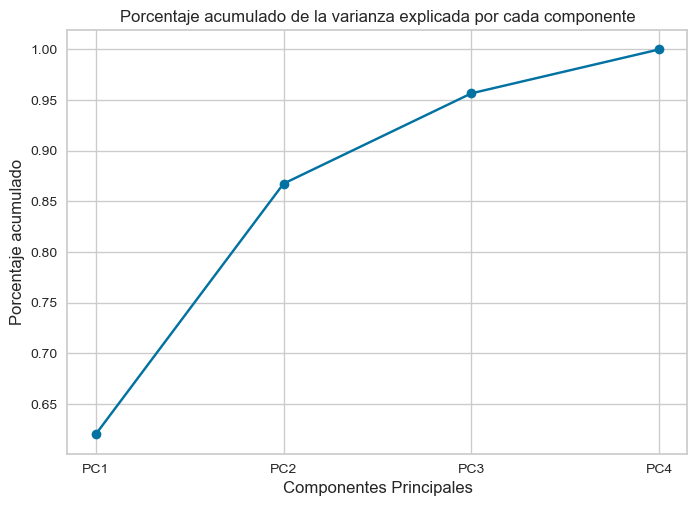

In [12]:
# Gráfico del porcentaje de varianza acumulada
plt.plot(["PC"+str(i+1) for i in range(pca_model.n_components_)], var_explicada, marker='o')
plt.title("Porcentaje acumulado de la varianza explicada por cada componente")
plt.xlabel("Componentes Principales")
plt.ylabel("Porcentaje acumulado")

In [13]:
# Pesos de las variables en cada componente
componentes = pd.DataFrame(pca_model.components_)
componentes.columns = X.columns
componentes.index = ["PC"+str(i+1) for i in range(pca_model.n_components_)]
componentes

,Asesinato,Agresión,Violación,Población
PC1,0.535899,0.583184,0.543432,0.278191
PC2,0.418181,0.187986,-0.167319,-0.872806
PC3,-0.341233,-0.268148,0.817778,-0.378016
PC4,0.649228,-0.743407,0.089024,0.133878


In [14]:
# Transformación de los datos originales
Z = pca_model.transform(X_scale)
Z = pd.DataFrame(Z)
Z.columns = ["PC"+str(i+1) for i in range(pca_model.n_components_)]
Z['Estado'] = datos['Estado']
Z

,PC1,PC2,PC3,PC4,Estado
0,0.985566,1.133392,-0.444269,0.156267,Alabama
1,1.950138,1.073213,2.040003,-0.438583,Alaska
2,1.763164,-0.745957,0.054781,-0.834653,Arizona
3,-0.141420,1.119797,0.114574,-0.182811,Arkansas
4,2.523980,-1.542934,0.598557,-0.341996,California
5,1.514563,-0.987555,1.095007,0.001465,Colorado
6,-1.358647,-1.088928,-0.643258,-0.118469,Connecticut
7,0.047709,-0.325359,-0.718633,-0.881978,Delaware
8,3.013042,0.039229,-0.576829,-0.096285,Florida
9,1.639283,1.278942,-0.342460,1.076797,Georgia


### Biplot

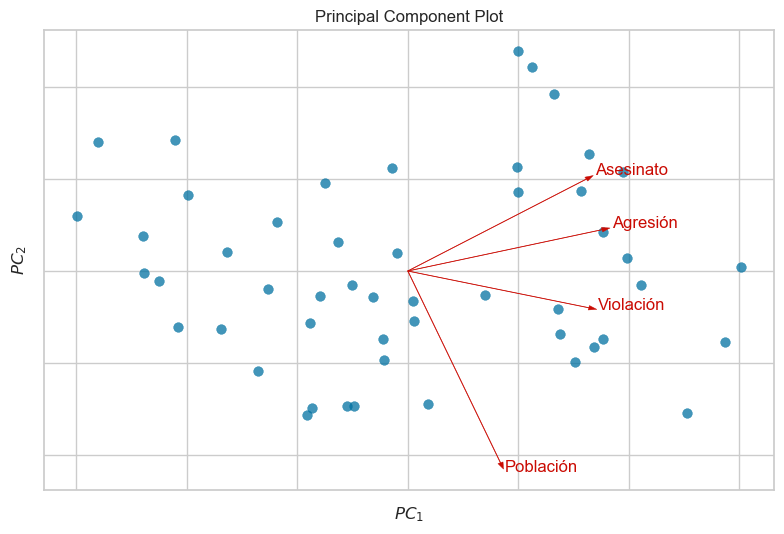

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [15]:
# Biplot
visualizer = biplot(scale=True, proj_features=True)
visualizer.fit_transform(X)
visualizer.show()

## Análisis de cluster

### Determinar el número de cluster

El KElbowVisualizer implementa el método "codo" para ayudar a seleccionar la cantidad óptima de clústeres ajustando el modelo con un rango de valores para el número de cluster.



C:\Users\ha.felizzola\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ha.felizzola\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ha.felizzola\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ha.felizzola\AppData\Local\anaconda3\lib\site-packages\sklearn\c

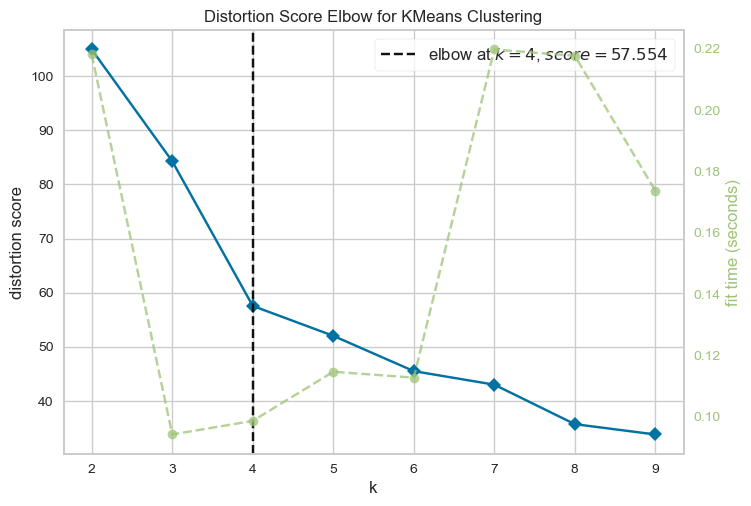

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Determinar el numero de cluster
n_cluster_vis = KElbowVisualizer(KMeans(n_init='auto', random_state=42), k=(2,10))
n_cluster_vis.fit(X_scale)
n_cluster_vis.show()

### Gráfico de Silueta


C:\Users\ha.felizzola\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


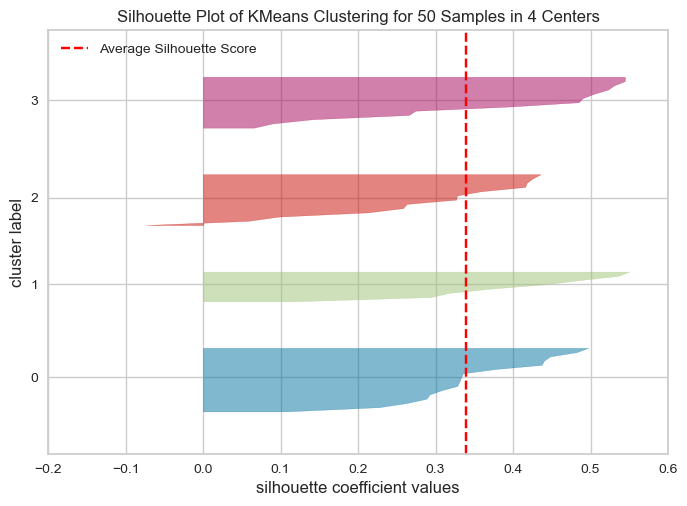

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 50 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
# Gráfico de silueta
silueta_vis = SilhouetteVisualizer(KMeans(4, n_init='auto', random_state=42), colors='yellowbrick')
silueta_vis.fit(X_scale)
silueta_vis.show()

### Clusters con Kmeans

In [18]:
cluster_model = KMeans(4, n_init='auto', random_state=42)
cluster_model.fit(X_scale)

C:\Users\ha.felizzola\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=42)

In [19]:
# Asignar el cluster
datos['Cluster'] = cluster_model.predict(X_scale)
datos

,Estado,Asesinato,Agresión,Violación,Población,Cluster
0,Alabama,13.2,236,21.2,58,1
1,Alaska,10.0,263,44.5,48,2
2,Arizona,8.1,294,31.0,80,2
3,Arkansas,8.8,190,19.5,50,1
4,California,9.0,276,40.6,91,2
5,Colorado,7.9,204,38.7,78,2
6,Connecticut,3.3,110,11.1,77,0
7,Delaware,5.9,238,15.8,72,0
8,Florida,15.4,335,31.9,80,2
9,Georgia,17.4,211,25.8,60,1


### Análisis Exploratorios con Cluster

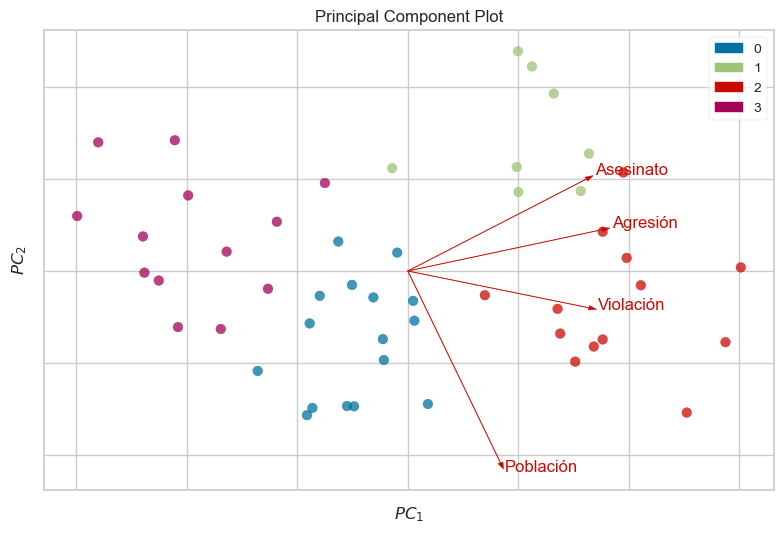

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [20]:
# Biplot y cluster
cluster_encoder = LabelEncoder().fit(datos['Cluster'])
y = cluster_encoder.transform(datos['Cluster'])
visualizer = biplot(scale=True, proj_features=True)
visualizer.fit_transform(X, y)
visualizer.show()

In [21]:
# Estadísticas por cluster
datos.groupby('Cluster').mean(numeric_only=True)

,Asesinato,Agresión,Violación,Población
Cluster,,,,
0,5.656250,138.875000,18.781250,73.875000
1,13.937500,243.625000,21.412500,53.750000
2,10.815385,257.384615,33.192308,76.000000
3,3.600000,78.538462,12.176923,52.076923


<Axes: xlabel='Cluster', ylabel='Agresión'>

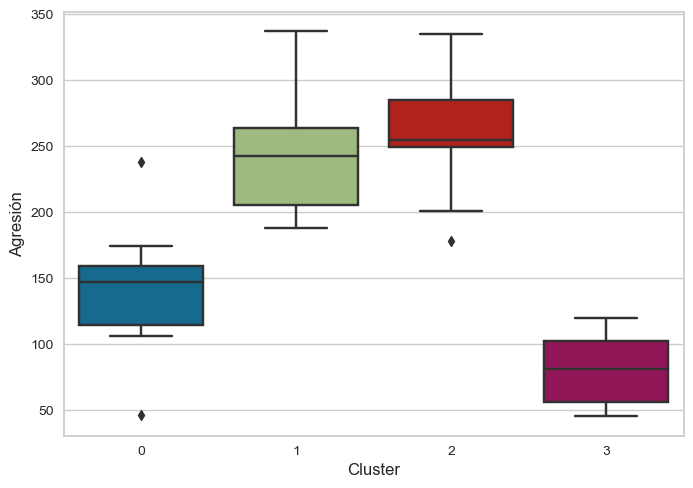

In [22]:
# Boxplot por cluster
sns.boxplot(data=datos, x='Cluster', y='Agresión')

<Axes: xlabel='Asesinato', ylabel='Población'>

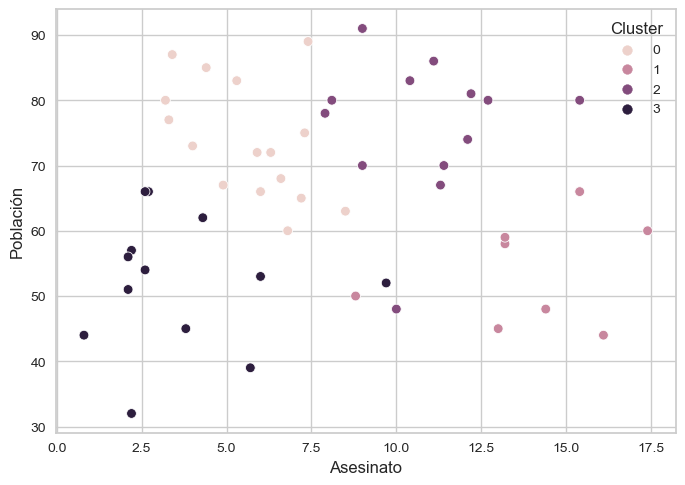

In [23]:
# Gráficos de dispersión
sns.scatterplot(data=datos, x='Asesinato', y='Población', hue='Cluster')

In [24]:
# Estados con mayor nivel de arrestos se encuentran en los cluster 1 y 2
Z['Cluster'] = cluster_model.predict(X_scale)
Z.loc[Z['Cluster'].isin([1,2]),['PC1','Estado','Cluster']]

,PC1,Estado,Cluster
0,0.985566,Alabama,1
1,1.950138,Alaska,2
2,1.763164,Arizona,2
3,-0.141420,Arkansas,1
4,2.523980,California,2
5,1.514563,Colorado,2
8,3.013042,Florida,2
9,1.639283,Georgia,1
12,1.378911,Illinois,2
17,1.564818,Louisiana,1


In [25]:
# Estados con mayor nivel de criminalidad
Z.sort_values(by='PC1', ascending=False).head(5)

,PC1,PC2,PC3,PC4,Estado,Cluster
8,3.013042,0.039229,-0.576829,-0.096285,Florida,2
27,2.874395,-0.775600,1.163380,0.314515,Nevada,2
4,2.523980,-1.542934,0.598557,-0.341996,California,2
21,2.108441,-0.155397,0.384869,0.102372,Michigan,2
30,1.980024,0.142849,0.183692,-0.339534,New Mexico,2


<Axes: ylabel='Estado'>

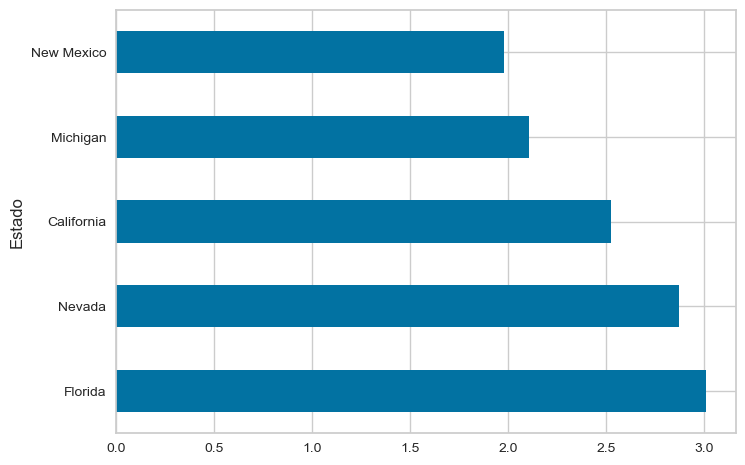

In [26]:
# Estados con mayor nivel de criminalidad
Z.sort_values(by='PC1', ascending=False).head(5).set_index('Estado')['PC1'].plot.barh()

In [27]:
# Estados con menor nivel de arrestos se encuentran en los cluster 0 y 3
Z.loc[Z['Cluster'].isin([0,3]),['PC1','Estado','Cluster']]

,PC1,Estado,Cluster
6,-1.358647,Connecticut,0
7,0.047709,Delaware,0
10,-0.912657,Hawaii,0
11,-1.639800,Idaho,3
13,-0.505461,Indiana,0
14,-2.253646,Iowa,3
15,-0.796881,Kansas,0
16,-0.750859,Kentucky,3
18,-2.396829,Maine,3
20,-0.486166,Massachusetts,0


# Caso 2. Compras de Clientes mayoristas

**Contexto**: El conjunto de datos se refiere a clientes de un distribuidor mayorista. Incluye el gasto anual en unidades monetarias (u.m.) en diversas categorías de productos:

1. Fresh: gasto anual en productos frescos
2. Milk: gasto anual en productos lácteos
3. Grocery: gasto anual en productos de abarrotes
4. Frozen: gasto anual en productos congelados
5. Detergents_Paper: gasto anual en detergentes y productos de papel
6. Delicatessen: gasto anual en productos y charcutería

Además, se tiene información sobre:
- Channel: Canal de clientes - (1) Horeca (Hotel/Restaurante/Cafetería) o (2) Canal Retail
- Region: Región del cliente

**Objetivo**:
- Hacer un análisis de componentes principales para identificar si los productos se pueden agrupar en categorías dependiendo de su correlación en el nivel de las compras.
- Hacer un análisis de cluster para identificar grupos de clientes según el nivel de compras de diferentes productos.

In [28]:
# Cargar datos
compras = pd.read_csv('wholesale_customers_data.csv')
compras

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [29]:
# Extraer las variables númericas
X = compras.drop(columns=['Channel','Region']).copy()

In [30]:
# Estandarizar los datos de entrada X


### Componentes principales

In [31]:
# Componentes Principales


In [32]:
# Porcentaje de varianza explicada


In [33]:
# ¿Qué porccentaje de varianza explican los dos primeros componentes?


In [34]:
# Gráfico del porcentaje de varianza acumulada


In [35]:
# Pesos de las variables en cada componente


**¿Cómo interpretaría los tres primeros componentes en relación a las variables originales?**

Conclusion:

In [36]:
# Transformación de los datos originales


# Agregue las columnas categóricas
# Z['Region'] = compras['Region']
# Z['Channel'] = compras['Channel']

In [37]:
# Gráfique los componentes principales


In [38]:
# Biplot diferenciando los puntos con la variable Channel
# channel_encoder = LabelEncoder().fit(Z['Channel'])
# y = channel_encoder.transform(Z['Channel'])


### Análisis de cluster

In [39]:
# Determinar el numero de cluster


In [40]:
# Gráfico de silueta


### Clusters con Kmeans

In [41]:
# Modelo de cluster


In [42]:
# Agregar a la tabla de los componentes principales el cluster
# Z['Cluster'] = cluster_model.predict(X_scale)


In [43]:
# Biplot diferenciando los puntos por color segun el cluster
# cluster_encoder = LabelEncoder().fit(Z['Cluster'])
# y = cluster_encoder.transform(Z['Cluster'])


## Reglas de Asociación

In [44]:
# Librerias para generar reglas de asociación
from mlxtend.frequent_patterns import apriori, association_rules

In [45]:
canasta = pd.read_csv('canasta_productos.csv')
canasta

,Galletas,Avena,Pan,Gaseosa,Café,Cereales de Maíz,Mermelada,Maggi,Leche,Azúcar,Té
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


In [46]:
# Generar la lista de items con un soporte mínimo
lista_soporte = apriori(canasta, min_support = 0.2, use_colnames = True)
lista_soporte

C:\Users\ha.felizzola\AppData\Local\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.35,(Galletas)
1,0.20,(Avena)
2,0.65,(Pan)
3,0.40,(Café)
4,0.30,(Cereales de Maíz)
5,0.25,(Maggi)
6,0.25,(Leche)
7,0.30,(Azúcar)
8,0.35,(Té)
9,0.20,"(Pan, Galletas)"


In [47]:
# Calcular las métricas para las reglas de asociación y filtrar aquellas con mínimo lift
reglas = association_rules(lista_soporte, metric = "confidence", min_threshold = 0.5)
reglas

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Galletas),(Pan),0.35,0.65,0.2,0.571429,0.879121,-0.0275,0.816667,-0.174603
1,(Leche),(Pan),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.750000,0.250000
2,(Azúcar),(Pan),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.050000,0.035714
3,(Té),(Pan),0.35,0.65,0.2,0.571429,0.879121,-0.0275,0.816667,-0.174603
4,(Cereales de Maíz),(Café),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.800000,0.571429
5,(Café),(Cereales de Maíz),0.40,0.30,0.2,0.500000,1.666667,0.0800,1.400000,0.666667
6,(Café),(Azúcar),0.40,0.30,0.2,0.500000,1.666667,0.0800,1.400000,0.666667
7,(Azúcar),(Café),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.800000,0.571429
8,(Maggi),(Té),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.250000,0.750000
9,(Té),(Maggi),0.35,0.25,0.2,0.571429,2.285714,0.1125,1.750000,0.865385


In [48]:
# Filtrar reglas por ítem y una metrica en particular
reglas[(reglas['consequents'] == {'Pan'}) & (reglas['lift'] > 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Leche),(Pan),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75,0.250000
2,(Azúcar),(Pan),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05,0.035714


In [49]:
# Filtrar reglas por métricas
reglas[reglas['lift'] > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Leche),(Pan),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75,0.250000
2,(Azúcar),(Pan),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05,0.035714
4,(Cereales de Maíz),(Café),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,0.571429
5,(Café),(Cereales de Maíz),0.40,0.30,0.2,0.500000,1.666667,0.0800,1.40,0.666667
6,(Café),(Azúcar),0.40,0.30,0.2,0.500000,1.666667,0.0800,1.40,0.666667
7,(Azúcar),(Café),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,0.571429
8,(Maggi),(Té),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25,0.750000
9,(Té),(Maggi),0.35,0.25,0.2,0.571429,2.285714,0.1125,1.75,0.865385


## Caso 3. Gastos Medicos - Reglas de Asociación

El objetivo es identificar reglas de asociación con altos gastos médicos, esto es gastos >= USD 20.000

In [50]:
# Cargar datos
gastos = pd.read_excel('gastos_medicos.xlsx')
gastos.head()

,sexo,edad,hijos,region,imc,fumador,gastos
0,mujer,19,0,suroccidente,27.900,si,16884.92
1,hombre,18,1,suroriente,33.770,no,1725.55
2,hombre,28,3,suroriente,33.000,no,4449.46
3,hombre,33,0,noroccidente,22.705,no,21984.47
4,hombre,32,0,noroccidente,28.880,no,3866.86


In [51]:
# Info del dataframe
gastos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sexo     1338 non-null   object 
 1   edad     1338 non-null   int64  
 2   hijos    1338 non-null   int64  
 3   region   1338 non-null   object 
 4   imc      1338 non-null   float64
 5   fumador  1338 non-null   object 
 6   gastos   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [52]:
# Resumen estadístico
gastos.describe()

,edad,hijos,imc,gastos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.094918,30.663397,13270.422280
std,14.049960,1.205493,6.098187,12110.011272
min,18.000000,0.000000,15.960000,1121.870000
25%,27.000000,0.000000,26.296250,4740.287500
50%,39.000000,1.000000,30.400000,9382.030000
75%,51.000000,2.000000,34.693750,16639.915000
max,64.000000,5.000000,53.130000,63770.430000


<Axes: ylabel='Frequency'>

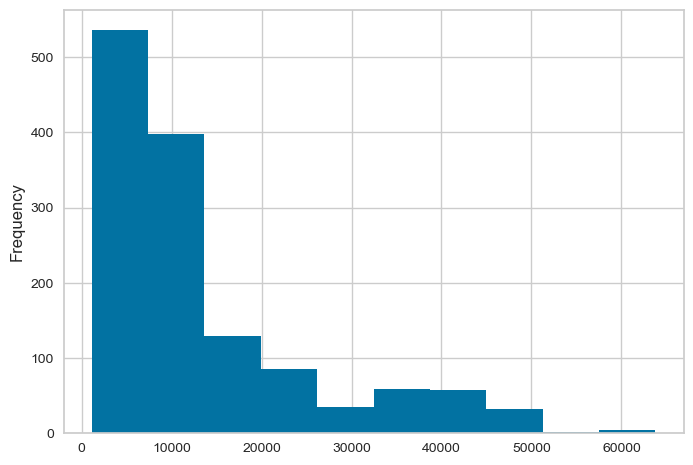

In [53]:
gastos['gastos'].plot.hist()

### Preparar datos

In [54]:
# Convertir datos numericos a categoricos

# Convertir edad en rangos de 10 años
gastos['rango_edad'] = pd.cut(gastos['edad'], bins=[i for i in range(10,80,10)])

# Definir los intervalos para la clasificación de peso según la OMS
intervalos = [0, 18.4, 24.9, 29.9, 34.9, 39.9,float('inf')]
categorias = ['Bajo Peso', 'Normal', 'Sobrepeso', 'Obesidad Grado I', 'Obesidad Grado II', 'Obesidad Grado III']

# Utilizar pd.cut para clasificar el peso
gastos['Categoria_Peso'] = pd.cut(gastos['imc'], bins=intervalos, labels=categorias)

# Convertir variable hijos a categorias
gastos['hijos'] = gastos['hijos'].astype('category')

gastos

,sexo,edad,hijos,region,imc,fumador,gastos,rango_edad,Categoria_Peso
0,mujer,19,0,suroccidente,27.900,si,16884.92,"(10, 20]",Sobrepeso
1,hombre,18,1,suroriente,33.770,no,1725.55,"(10, 20]",Obesidad Grado I
2,hombre,28,3,suroriente,33.000,no,4449.46,"(20, 30]",Obesidad Grado I
3,hombre,33,0,noroccidente,22.705,no,21984.47,"(30, 40]",Normal
4,hombre,32,0,noroccidente,28.880,no,3866.86,"(30, 40]",Sobrepeso
...,...,...,...,...,...,...,...,...,...
1333,hombre,50,3,noroccidente,30.970,no,10600.55,"(40, 50]",Obesidad Grado I
1334,mujer,18,0,nororiente,31.920,no,2205.98,"(10, 20]",Obesidad Grado I
1335,mujer,18,0,suroriente,36.850,no,1629.83,"(10, 20]",Obesidad Grado II
1336,mujer,21,0,suroccidente,25.800,no,2007.94,"(20, 30]",Sobrepeso


In [55]:
# Gastos de mas de USD 20.000
gastos['Gasto_Alto'] = np.int32(gastos['gastos'] >= 20000)
gastos

,sexo,edad,hijos,region,imc,fumador,gastos,rango_edad,Categoria_Peso,Gasto_Alto
0,mujer,19,0,suroccidente,27.900,si,16884.92,"(10, 20]",Sobrepeso,0
1,hombre,18,1,suroriente,33.770,no,1725.55,"(10, 20]",Obesidad Grado I,0
2,hombre,28,3,suroriente,33.000,no,4449.46,"(20, 30]",Obesidad Grado I,0
3,hombre,33,0,noroccidente,22.705,no,21984.47,"(30, 40]",Normal,1
4,hombre,32,0,noroccidente,28.880,no,3866.86,"(30, 40]",Sobrepeso,0
...,...,...,...,...,...,...,...,...,...,...
1333,hombre,50,3,noroccidente,30.970,no,10600.55,"(40, 50]",Obesidad Grado I,0
1334,mujer,18,0,nororiente,31.920,no,2205.98,"(10, 20]",Obesidad Grado I,0
1335,mujer,18,0,suroriente,36.850,no,1629.83,"(10, 20]",Obesidad Grado II,0
1336,mujer,21,0,suroccidente,25.800,no,2007.94,"(20, 30]",Sobrepeso,0


In [56]:
# Eliminar variables numericas
df = gastos.drop(columns=['imc','gastos','edad'])

# Convertir a dummies
df = pd.get_dummies(df)
df

,Gasto_Alto,sexo_hombre,sexo_mujer,hijos_0,hijos_1,hijos_2,hijos_3,hijos_4,hijos_5,region_noroccidente,region_nororiente,region_suroccidente,region_suroriente,fumador_no,fumador_si,"rango_edad_(10, 20]","rango_edad_(20, 30]","rango_edad_(30, 40]","rango_edad_(40, 50]","rango_edad_(50, 60]","rango_edad_(60, 70]",Categoria_Peso_Bajo Peso,Categoria_Peso_Normal,Categoria_Peso_Sobrepeso,Categoria_Peso_Obesidad Grado I,Categoria_Peso_Obesidad Grado II,Categoria_Peso_Obesidad Grado III
0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1334,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1335,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1336,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


### Reglas de asociación

Encuentre reglas de asociación con un support mínimo de 0.1, 0.05, 0.03. ¿Qué reglas encuentra relevantes?

In [57]:
# Generar la lista de items con un soporte mínimo de 0.1


In [58]:
# Determinar las reglas de asociación con un mínimo de confianza de 0.5


In [59]:
# Filtrar reglas por ítem (reglas['consequents'] == {'Gasto_Alto'}) & (reglas['lift'] > 1)
